## MNIST Handwritten Digit Recognition

[MNIST](http://yann.lecun.com/exdb/mnist) is often considered the [hello world](https://en.wikipedia.org/wiki/%22Hello,_World!%22_program) of machine learning. It contains 70,000 images of handwritten digits suitable for image classification. Typically, 60,000 of these images are used for training and 10,000 are set aside for testing. Each digit is a black and white 28 x 28 pixel image along with a label, so the full dataset can be used for supervised training as well as testing unsupervised algorithms.

Over the years, MNIST has been used to measure the accuracy of a number of different algorithms. In this example, we will train a standard three layer neural network. Even this simple model can achieve 98% accuracy, rivaling human performance.

This example requires Python 3, Keras, Tensorflow, matplotlib, and numpy. You can use either Tensorflow-CPU or Tensorflow-GPU, of course Tensorflow-GPU will train significantly faster.

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

Using TensorFlow backend.


These are some configuration parameters and hyperparameters.

In [2]:
# Input image dimensions
img_rows, img_cols = 28, 28

# The number of training samples per batch. 128 is a reasonable number.
batch_size = 128

# Our data set contains 10 digits, so the number of classes is 10
num_classes = 10

# epochs is the number of times the model is trained with the data set, more can be better, up to a point
epochs = 20

# dropout is a common regularization hyperperameter. It helps to avoid overfitting or memorizing the input.
dropout = 0.5

### Load data

Keras has a builting function for loading MNIST data and splitting it into train and test sets. x_train and x_test are arrays of train and test input images respectively. Images are represented as a 28 x 28 matrix of pixel values. y_train and y_test are train and test labels respectively.

Pixel values are normalized into values ranging from 0.0 - 1.0.

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Save original test images for display purposes
orig_test = x_test

x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


The following cell display random test images to get an idea of what they look like.

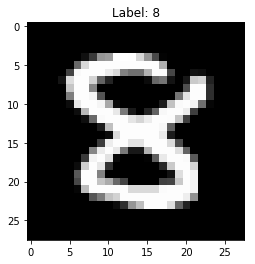

In [6]:
index = random.randrange(1000)
plt.imshow(orig_test[index], cmap='gray')
plt.title('Label: %d' % y_test[index])
plt.show()

### Define Model

This is the neural network model itself built using predefined Keras classes. This is a simple three layer model using dense, fully connected layers. Still, it achieves very good accuracy which demonstrates the predictive power of properly trained neural networks. The initial layer flattens the input matrix into a 784 element vector.

The following two layers use a REctified Linear Unit activation function, which does not suffer from the "vanishing gradient" problem that plagued traditional sigmoid activation functions in the past. The output layer has 10 neurons corresponding to one of 10 possible digit classes. The neuron with the largest output is the most likely digit. This is known as one-hot encoding, a concept borrowed from digital logic.

The best image recognition models use Convolutional Neural Networks (CNNs), which are like two dimensional FIR filters. The inpiration for CNNs comes from the visual cortex of animal brains. Models with over 100 CNN, pooling, padding, and other layers have been successfully trained to recognize complex objects as well as multiple objects in the one image.

In [7]:
# Create three layer model, two hidden layers, one output layer
model = Sequential()
model.add(Flatten(input_shape=(img_rows, img_cols)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(512, activation='relu'))
model.add(Dropout(dropout))
# 10 output units, one for each digit (one hot encoding)
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)      

### Train Model

This is more or less boilerplate Keras code to train the model given the training data set. Keras can also evaluate the trained model given the test data set. Matplotlib is used to plot train and test accuracy as a function of the epoch number.

Ideally, the accuracy with test and train data should be about the same. Low training accuracy means the model exhibits high bias. High bias could be caused by a weak model, not enough training examples, or too few training epochs. High train accuracy and low test accuracy is a case of high variance. This means the model is more or less "memorizing" the expected output and not generalizing well. High variance can be reduced through *regularization*.

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 225us/step - loss: 0.3484 - acc: 0.8924 - val_loss: 0.1248 - val_acc: 0.9614
Epoch 2/20
60000/60000 [==============================] - 13s 210us/step - loss: 0.1617 - acc: 0.9509 - val_loss: 0.0953 - val_acc: 0.9705
Epoch 3/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.1292 - acc: 0.9608 - val_loss: 0.0818 - val_acc: 0.9740
Epoch 4/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.1112 - acc: 0.9658 - val_loss: 0.0802 - val_acc: 0.9755
Epoch 5/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.0958 - acc: 0.9696 - val_loss: 0.0710 - val_acc: 0.9802
Epoch 6/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.0859 - acc: 0.9731 - val_loss: 0.0642 - val_acc: 0.9801
Epoch 7/20
60000/60000 [==============================] - 11s 184us/s

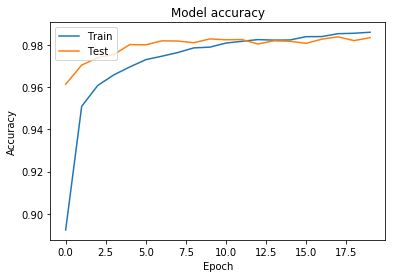

In [8]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['acc'])

# Train model for a given number of epochs
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# Evaluate model against test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Save model structure and trained weights/biases to separate files.

These files will be used to restore the trained model at prediction time.

In [9]:
model_structure = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_structure)
model.save_weights("weights.h5")